In [26]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd
%matplotlib inline

daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')

/home/brad/DailyLog/20180723/


In [46]:
# JS Div matrices
f_pop1_familiar = '/home/brad/tmpdata/JSpop_B1083-1--1.0-10_LvsR-2.pkl'
f_pop2_familiar = '/home/brad/tmpdata/JSpop_B1083-5-1--1.0-10_LvsR-2.pkl'

f_pop1_familiar_shuffled = '/home/brad/tmpdata/JSpop_B1083-1--1.0-10_LvsR-2-shuffled.pkl'
f_pop2_familiar_shuffled = '/home/brad/tmpdata/JSpop_B1083-5-1--1.0-10_LvsR-2-shuffled.pkl'

f_pop1_unfamiliar = '/home/brad/tmpdata/JSpop_B1083-1--1.0-10_LvsR-2-unfamiliar.pkl'
f_pop2_unfamiliar = '/home/brad/tmpdata/JSpop_B1083-5-1--1.0-10_LvsR-2-unfamiliar.pkl'

f_pop1_unfamiliar_shuffled = '/home/brad/tmpdata/JSpop_B1083-1--1.0-10_LvsR-2-unfamiliar-shuffled.pkl'
f_pop2_unfamiliar_shuffled = '/home/brad/tmpdata/JSpop_B1083-5-1--1.0-10_LvsR-2-unfamiliar-shuffled.pkl'

data_files = [f_pop1_familiar, f_pop2_familiar,
              f_pop1_familiar_shuffled, f_pop2_familiar_shuffled,
              f_pop1_unfamiliar, f_pop2_unfamiliar,
              f_pop1_unfamiliar_shuffled, f_pop2_unfamiliar_shuffled]
plot_titles = ('B1083 Population 1 Familiar', 'B1083 Population 2 Familiar',
               'B1083 Population 1 Familiar Shuffled', 'B1083 Population 2 Familiar Shuffled',
               'B1083 Population 1 Unfamiliar', 'B1083 Population 2 Unfamiliar',
               'B1083 Population 1 Unfamiliar Shuffled', 'B1083 Population 2 Unfamiliar Shuffled')

In [47]:
# cond: -1 = different, 1 = same class
def build_lmm_dataset(div_matrix):
    n, _ = np.shape(div_matrix)
    h = int(n/2)
    
    LR_mask = np.zeros((n, n))
    LR_mask[0:h, h:n] = 1
    LR_data = div_matrix[0:h, h:n]
    LR_inds = np.nonzero(LR_mask)
    LR_condition = len(LR_inds[0])*['different']
    LR_i = LR_inds[0]
    LR_j = LR_inds[1]
    
    LL_data = div_matrix[0:h, 0:h][np.triu_indices(20, 1)]
    LL_condition = len(LL_data)*['same']
    LL_i = np.triu_indices(20, 1)[0]
    LL_j = np.triu_indices(20, 1)[1]
    
    RR_data = div_matrix[h:n, h:n][np.triu_indices(20, 1)] 
    RR_condition = len(RR_data)*['same']
    RR_i = np.triu_indices(20, 1)[0] + h
    RR_j = np.triu_indices(20, 1)[1] + h
    
    dat_cat = np.concatenate((LL_data, LR_data.flatten(), RR_data))
    i_cat = np.concatenate((LL_i, LR_i, RR_i))
    j_cat = np.concatenate((LL_j, LR_j, RR_j))
    cond_cat = np.concatenate((LL_condition, LR_condition, RR_condition))
    
    df_out = pd.DataFrame(data={'JS': dat_cat, 'i': i_cat, 'j': j_cat, 'cond': cond_cat})
    return df_out
    

In [48]:
with open(f_pop2_familiar, 'rb') as f:
    div = pickle.load(f)

In [49]:
dataset = build_lmm_dataset(div)
dataset.to_csv(os.path.join(figsavepth, 'JSdataframe_pop2.csv'))

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'statsmodels'

In [39]:
import seaborn as sns

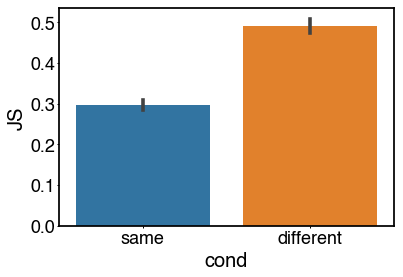

In [50]:
sns.barplot(x='cond', y='JS', data=dataset)